In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

In [49]:
#Load the data
x = np.load('./X.npy', allow_pickle=True)
y = np.load('./y.npy', allow_pickle=True)
np.nan_to_num(x,0)

array([[ 7.23267436e-01,  9.76336300e-02,  3.12463820e-01, ...,
        -3.40898895e+01, -1.90405726e-01,  7.56735802e-02],
       [ 5.37877202e-01,  8.07771459e-02,  2.84213215e-01, ...,
        -3.02505894e+01,  1.13161340e-01,  2.41499424e-01],
       [ 3.09401631e-01,  3.23186181e-02,  1.79773793e-01, ...,
        -1.79960537e+01, -1.09656930e-01, -6.36193752e-02],
       ...,
       [ 5.96247137e-01,  8.57254341e-02,  2.92789072e-01, ...,
        -3.15021992e+01, -8.84332210e-02, -3.94949675e-01],
       [ 3.03517491e-01,  7.38315582e-02,  2.71719635e-01, ...,
        -3.46965561e+01,  1.13321029e-01,  9.41651344e-01],
       [ 5.73514521e-01,  3.69564332e-02,  1.92240566e-01, ...,
        -1.16448154e+01,  2.25810148e-02, -2.05043793e-01]])

In [50]:

X_train, XX, y_train, YY = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(XX, YY, test_size=0.5,random_state=42, stratify=YY )

scaler = StandardScaler(copy=False)
scaler.fit_transform(X_train)
scaler.transform(X_test)
scaler.transform(X_val)

array([[ 0.34819095,  1.19882548,  1.13110697, ..., -0.01390718,
        -0.53547482, -0.53027602],
       [ 0.44033729,  1.51378402,  1.37706143, ...,  1.01883209,
         0.6021113 , -0.17970941],
       [ 0.34156642, -0.40450014, -0.30507402, ...,  0.12128097,
         1.35698375, -0.87706524],
       ...,
       [-0.7849381 , -0.85063863, -0.78512506, ...,  0.26263994,
        -0.7267339 , -0.80973667],
       [-0.74498751, -1.33394448, -1.37070101, ..., -1.20943548,
        -1.19057337,  0.17673418],
       [ 0.35811563,  1.15877681,  1.09915612, ...,  2.09519371,
         2.2892034 ,  0.38364113]])

In [51]:

all_score = []
all_k = []
for k in range(1,328,2):
 clf  = KNeighborsClassifier(n_neighbors=k)
 clf.fit(X_train, y_train)
 score = clf.score(X_val, y_val)
 all_score.append(score)
 all_k.append(k)

all_score = np.array(all_score)
all_k = np.array(all_k)

In [52]:
K = all_k[np.argmax(all_score)]
print(K)
np.max(all_score[np.argmax(all_score)])


5


0.4856070087609512

In [53]:
#final testing and final model
print(K)
clf  = KNeighborsClassifier(n_neighbors=K)
clf .fit(X_train, y_train)
score = clf.score(X_test, y_test)
score

5


0.48125

In [63]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 48.12%
Classification Report:
               precision    recall  f1-score   support

   Electronic       0.49      0.36      0.41       100
 Experimental       0.46      0.21      0.29       100
         Folk       0.54      0.76      0.63       100
      Hip-Hop       0.41      0.66      0.51       100
 Instrumental       0.67      0.45      0.54       100
International       0.46      0.64      0.54       100
          Pop       0.32      0.19      0.24       100
         Rock       0.52      0.58      0.55       100

     accuracy                           0.48       800
    macro avg       0.48      0.48      0.46       800
 weighted avg       0.48      0.48      0.46       800



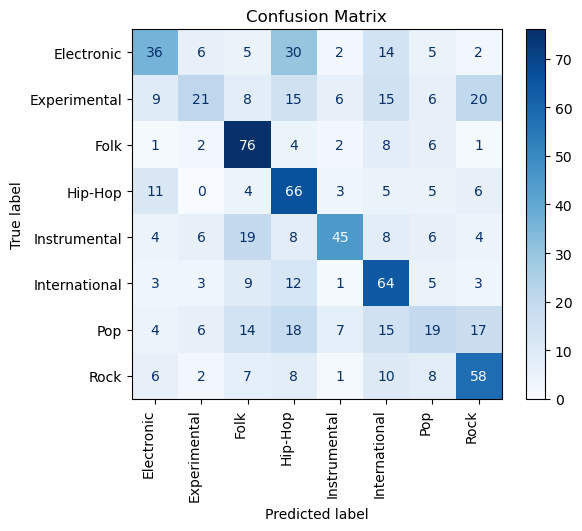

In [57]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)

class_names = ['Electronic', 'Experimental', 'Folk', 'Hip-Hop', 'Instrumental', 'International',  'Pop', 'Rock']
#class_names = ['Blues', 'Classical', 'Country', 'Easy Listening', 'Electronic', 'Experimental', 'Folk', 'Hip-Hop', 'Instrumental', 'International', 'Jazz', 'Old-Time / Historic', 'Pop', 'Rock', 'Soul-RnB', 'Spoken' ]

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)

disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90, ha='right')
plt.title("Confusion Matrix")
plt.show()


In [60]:
from joblib import dump
# Save model
dump(clf, 'models/KN_small_model.joblib')

['models/KN_small_model.joblib']

In [61]:
from datapreprosessing import *

def classify_genre(audio_path):
    
    features = extract_features(audio_path) 
    features = features.reshape(1, -1)
    genre= clf.predict(features)[0]
    return genre

d = classify_genre('fma_small/000/000002.mp3')
print(d)

OSError: cannot load library '/usr/local/lib/libsndfile.dylib': dlopen(/usr/local/lib/libsndfile.dylib, 0x0002): tried: '/usr/local/lib/libsndfile.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/usr/local/lib/libsndfile.dylib' (no such file), '/usr/local/lib/libsndfile.dylib' (no such file)